In [1]:
# Load all required libraries
suppressMessages({
  library(tidyverse)
  library(ggplot2)
  library(car)           # For VIF
  library(corrplot)      # For correlation plots
  library(mediation)     # For mediation analysis
  library(glmnet)        # For Lasso regression
  library(patchwork)     # For combining plots
  library(RColorBrewer)
  library(sjPlot)
})

Warning message:
“package ‘RColorBrewer’ was built under R version 4.0.5”


In [2]:
# Load data
df_responses <- read.csv("../data/hallucinations_preprocessed_assigned_ls_norms.csv")

# Check data structure
cat("Dataset dimensions:", dim(df_responses), "\n")
cat("Available columns:\n")
print(names(df_responses))

Dataset dimensions: 4057 34 
Available columns:
 [1] "id"                        "gender"                   
 [3] "age"                       "visual_vividness"         
 [5] "view_duration"             "lights"                   
 [7] "computer"                  "emotion"                  
 [9] "hallucination_categorical" "hallucination_description"
[11] "emerge_time"               "hallucination_frequency"  
[13] "hallucination_intensity"   "hallucination_duration"   
[15] "consciousness_change"      "consciousness_description"
[17] "hallucination_location"    "percent_missing"          
[19] "auditory_strength"         "gustatory_strength"       
[21] "haptic_strength"           "interoceptive_strength"   
[23] "olfactory_strength"        "visual_strength"          
[25] "foot_strength"             "hand_strength"            
[27] "head_strength"             "mouth_strength"           
[29] "torso_strength"            "perceptual_strength"      
[31] "action_strength"           "sen

In [3]:
# Create scaled versions of all predictors
df_responses <- df_responses %>%
  mutate(
    # Sensory dimensions scaled
    visual_strength_scaled = as.numeric(scale(visual_strength)),
    auditory_strength_scaled = as.numeric(scale(auditory_strength)),
    gustatory_strength_scaled = as.numeric(scale(gustatory_strength)),
    haptic_strength_scaled = as.numeric(scale(haptic_strength)),
    olfactory_strength_scaled = as.numeric(scale(olfactory_strength)),
    interoceptive_strength_scaled = as.numeric(scale(interoceptive_strength)),
    # Motor dimensions scaled
    head_strength_scaled = as.numeric(scale(head_strength)),
    hand_strength_scaled = as.numeric(scale(hand_strength)),
    mouth_strength_scaled = as.numeric(scale(mouth_strength)),
    torso_strength_scaled = as.numeric(scale(torso_strength)),
    foot_strength_scaled = as.numeric(scale(foot_strength)),
    # Overall measures scaled
    perceptual_strength_scaled = as.numeric(scale(perceptual_strength)),
    action_strength_scaled = as.numeric(scale(action_strength)),
    sensorimotor_strength_scaled = as.numeric(scale(sensorimotor_strength)),
    description_length_scaled = as.numeric(scale(description_length))
  )

# Define predictor groups
sensory_dims <- c("visual_strength", "auditory_strength", "gustatory_strength", 
                  "haptic_strength", "olfactory_strength", "interoceptive_strength")
motor_dims <- c("head_strength", "hand_strength", "mouth_strength", 
                "foot_strength", "torso_strength")
overall_dims <- c("perceptual_strength", "action_strength", "sensorimotor_strength")

cat("Data preparation complete.\n")
cat("Sample size:", nrow(df_responses), "\n")

Data preparation complete.
Sample size: 4057 


In [6]:
cat("=== QUESTION 0: DOES DESCRIPTION LENGTH PREDICT VISUAL IMAGERY? ===\n")

# Model 1: Description length
model_length <- glm(visual_vividness ~ scale(description_length), data = df_responses)
cat("Description Length Model:\n")
print(summary(model_length))


# Store results for interpretation
description_length_results <- data.frame(
  Measure = "Description Length",
  Beta = summary(model_length)$coefficients[2,1],
  SE = summary(model_length)$coefficients[2,2],
  P_value = summary(model_length)$coefficients[2,4]
)
print(description_length_results)

=== QUESTION 0: DOES DESCRIPTION LENGTH PREDICT VISUAL IMAGERY? ===
Description Length Model:

Call:
glm(formula = visual_vividness ~ scale(description_length), data = df_responses)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-6.4064  -2.8957   0.1508   2.6859   5.1624  

Coefficients:
                          Estimate Std. Error t value Pr(>|t|)    
(Intercept)                5.05595    0.04891 103.366  < 2e-16 ***
scale(description_length)  0.33280    0.04892   6.803 1.17e-11 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for gaussian family taken to be 9.706309)

    Null deviance: 39808  on 4056  degrees of freedom
Residual deviance: 39359  on 4055  degrees of freedom
AIC: 20738

Number of Fisher Scoring iterations: 2

             Measure     Beta         SE      P_value
1 Description Length 0.332797 0.04891906 1.174586e-11


In [10]:
cat("=== QUESTION 1: OVERALL PERCEPTUAL AND MOTOR STRENGTH DIFFERENCES ===\n")

# Model 1: Overall perceptual strength
model_perceptual_motor <- glm(visual_vividness ~ perceptual_strength_scaled + action_strength_scaled + scale(description_length), data = df_responses)
cat("Perceptual and Motor Strength Model:\n")
print(summary(model_perceptual_motor))


# Store results for interpretation
overall_results <- data.frame(
  Measure = "Perceptual & Motor",
  Beta = summary(model_perceptual_motor)$coefficients[2,1],
  SE = summary(model_perceptual_motor)$coefficients[2,2],
  P_value = summary(model_perceptual_motor)$coefficients[2,4]
)
print(overall_results)

=== QUESTION 1: OVERALL PERCEPTUAL AND MOTOR STRENGTH DIFFERENCES ===
Perceptual and Motor Strength Model:

Call:
glm(formula = visual_vividness ~ perceptual_strength_scaled + 
    action_strength_scaled + scale(description_length), data = df_responses)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-6.8750  -2.8233   0.3978   2.5769   6.9787  

Coefficients:
                           Estimate Std. Error t value Pr(>|t|)    
(Intercept)                 5.05595    0.04841 104.447  < 2e-16 ***
perceptual_strength_scaled  0.34676    0.05304   6.538 7.01e-11 ***
action_strength_scaled      0.21345    0.05123   4.166 3.16e-05 ***
scale(description_length)   0.42210    0.05033   8.386  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for gaussian family taken to be 9.506432)

    Null deviance: 39808  on 4056  degrees of freedom
Residual deviance: 38530  on 4053  degrees of freedom
AIC: 20656

Number of Fisher Scoring

In [11]:
cat("=== QUESTION 2: WHICH SENSORY DIMENSIONS ARE DRIVING IT? ===\n")

# Fit sensory model with all dimensions
model_sensory_full <- glm(visual_vividness ~ 
                         scale(visual_strength) + scale(auditory_strength) + 
                         scale(gustatory_strength) + scale(haptic_strength) + 
                         scale(olfactory_strength) + scale(interoceptive_strength) + 
                         scale(description_length), 
                         data = df_responses)

cat("Full Sensory Model Summary:\n")
print(summary(model_sensory_full))

# Check VIF for multicollinearity
cat("\nVIF values for sensory model:\n")
vif_sensory <- vif(model_sensory_full)
print(vif_sensory)

# Check for problematic VIF values
problematic_vif <- vif_sensory[vif_sensory > 5]
if(length(problematic_vif) > 0) {
  cat("\nPotentially problematic predictors (VIF > 5):\n")
  print(problematic_vif)
} else {
  cat("\nNo multicollinearity concerns (all VIF < 5)\n")
}

=== QUESTION 2: WHICH SENSORY DIMENSIONS ARE DRIVING IT? ===
Full Sensory Model Summary:

Call:
glm(formula = visual_vividness ~ scale(visual_strength) + scale(auditory_strength) + 
    scale(gustatory_strength) + scale(haptic_strength) + scale(olfactory_strength) + 
    scale(interoceptive_strength) + scale(description_length), 
    data = df_responses)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-8.6230  -2.7472   0.2932   2.4788   7.1777  

Coefficients:
                              Estimate Std. Error t value Pr(>|t|)    
(Intercept)                    5.05595    0.04783 105.707  < 2e-16 ***
scale(visual_strength)         0.39968    0.06822   5.859 5.03e-09 ***
scale(auditory_strength)       0.18242    0.06222   2.932 0.003387 ** 
scale(gustatory_strength)     -0.27667    0.07654  -3.615 0.000304 ***
scale(haptic_strength)         0.31878    0.05337   5.973 2.54e-09 ***
scale(olfactory_strength)      0.35862    0.08279   4.332 1.51e-05 ***
scale(interocepti

In [12]:
cat("=== QUESTION 3: WHICH MOTOR DIMENSIONS ARE DRIVING IT? ===\n")

# Fit motor model with all dimensions
model_motor_full <- glm(visual_vividness ~ 
                       scale(head_strength) + scale(hand_strength) + scale(mouth_strength) + 
                       scale(torso_strength) + scale(foot_strength) + scale(description_length),
                       data = df_responses)

cat("Full Motor Model Summary:\n")
print(summary(model_motor_full))

# Check VIF for motor model
cat("\nVIF values for motor model:\n")
vif_motor <- vif(model_motor_full)
print(vif_motor)

# Check for problematic VIF values
problematic_vif_motor <- vif_motor[vif_motor > 5]
if(length(problematic_vif_motor) > 0) {
  cat("\nPotentially problematic predictors (VIF > 5):\n")
  print(problematic_vif_motor)
} else {
  cat("\nNo multicollinearity concerns (all VIF < 5)\n")
}

=== QUESTION 3: WHICH MOTOR DIMENSIONS ARE DRIVING IT? ===
Full Motor Model Summary:

Call:
glm(formula = visual_vividness ~ scale(head_strength) + scale(hand_strength) + 
    scale(mouth_strength) + scale(torso_strength) + scale(foot_strength) + 
    scale(description_length), data = df_responses)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-7.3448  -2.7758   0.3738   2.5339   6.7126  

Coefficients:
                          Estimate Std. Error t value Pr(>|t|)    
(Intercept)                5.05595    0.04826 104.767  < 2e-16 ***
scale(head_strength)       0.25163    0.05316   4.733 2.29e-06 ***
scale(hand_strength)       0.37266    0.06676   5.582 2.54e-08 ***
scale(mouth_strength)     -0.08951    0.06338  -1.412   0.1579    
scale(torso_strength)      0.03387    0.10978   0.308   0.7577    
scale(foot_strength)       0.16984    0.09766   1.739   0.0821 .  
scale(description_length)  0.35086    0.04915   7.138 1.11e-12 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘

`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


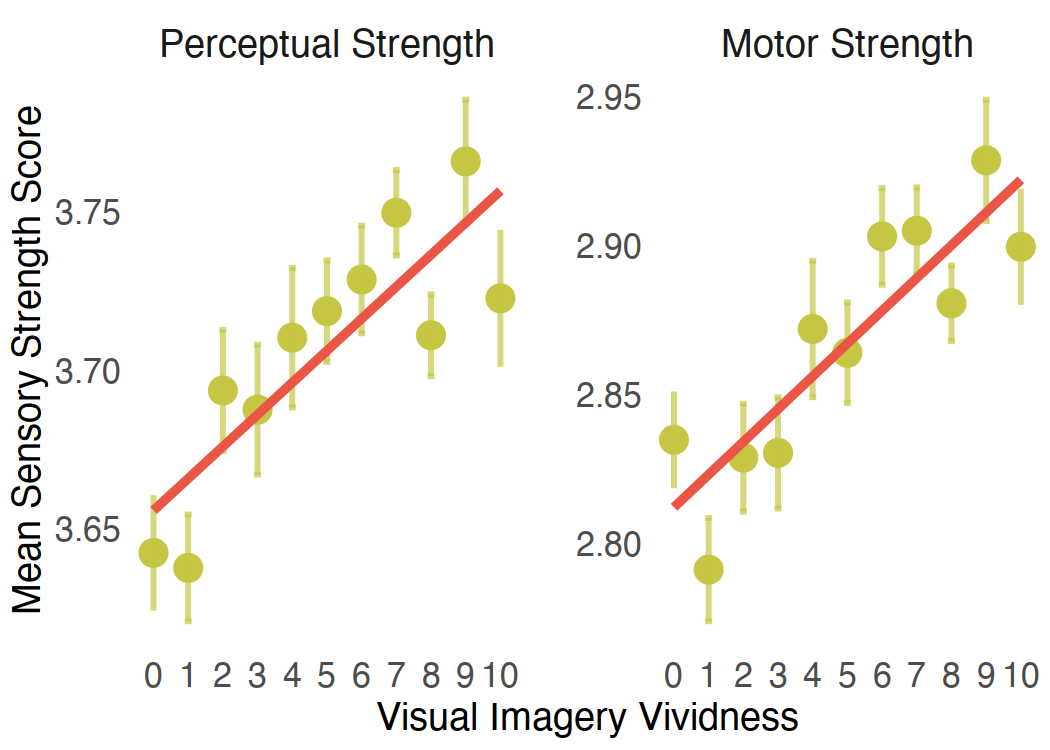

In [14]:
# Create visualization data for sensory dimensions
overall_dims <- c("perceptual_strength", "action_strength")  # Removed sensorimotor_strength
df_overall_subset <- df_responses[, c("visual_vividness", overall_dims)]

df_overall_long <- pivot_longer(df_overall_subset, 
                               cols = -visual_vividness,
                               names_to = "overall_dimension", 
                               values_to = "strength_score")

# Clean up dimension names - reordered to put Perceptual first
df_overall_long$overall_dimension <- case_when(
  df_overall_long$overall_dimension == "perceptual_strength" ~ "Perceptual Strength",
  df_overall_long$overall_dimension == "action_strength" ~ "Motor Strength"
)

# Ensure proper ordering of facets
df_overall_long$overall_dimension <- factor(df_overall_long$overall_dimension, 
                                          levels = c("Perceptual Strength", "Motor Strength"))

# Calculate summary statistics
df_overall_summary <- df_overall_long %>%
  group_by(visual_vividness, overall_dimension) %>%
  summarise(
    mean_strength = mean(strength_score, na.rm = TRUE),
    se_strength = sd(strength_score, na.rm = TRUE) / sqrt(n()),
    .groups = "drop"
  )

# Create sensory plot with publication formatting and figsize
p_sensory_motor <- ggplot(df_overall_summary, aes(x = visual_vividness, y = mean_strength)) +
  geom_point(color = "#c5c643", size = 2.5) +
  geom_errorbar(aes(ymin = mean_strength - se_strength, ymax = mean_strength + se_strength), 
                color = "#c5c643", width = 0.2, alpha = 0.7, linewidth = 0.5) +
  geom_smooth(method = "lm", se = FALSE, color = "#ea5545", linewidth = 0.8) +
  facet_wrap(~overall_dimension, scales = "free_y", ncol = 2) +
  scale_x_continuous(breaks = 0:10, limits = c(0, 10)) +
  labs(x = "Visual Imagery Vividness", 
       y = "Mean Sensory Strength Score") +
  theme_minimal(base_size = 8, base_family = "Helvetica") +
  theme(
    strip.text = element_text(face = "bold", size = 9),
    panel.grid = element_blank(),
    panel.background = element_blank(),
    axis.title = element_text(size = 9),
    axis.text = element_text(size = 8),
    panel.spacing = unit(0.5, "cm"),
    plot.margin = unit(c(0.1, 0.1, 0.1, 0.1), "cm")
  ) +
  # Set figure size for single-column publication
  theme(plot.background = element_rect(fill = "white", color = NA)) +
  coord_cartesian(clip = "off")

# Apply figsize using options
options(repr.plot.width = 3.5, repr.plot.height = 2.5, repr.plot.res = 300)

# Save the plot
ggsave("../plots/sensory_motor_plot.png", p_sensory_motor, 
       width = 3.5, height = 2.5, units = "in", dpi = 300)

print(p_sensory_motor)

Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”
`geom_smooth()` using formula = 'y ~ x'


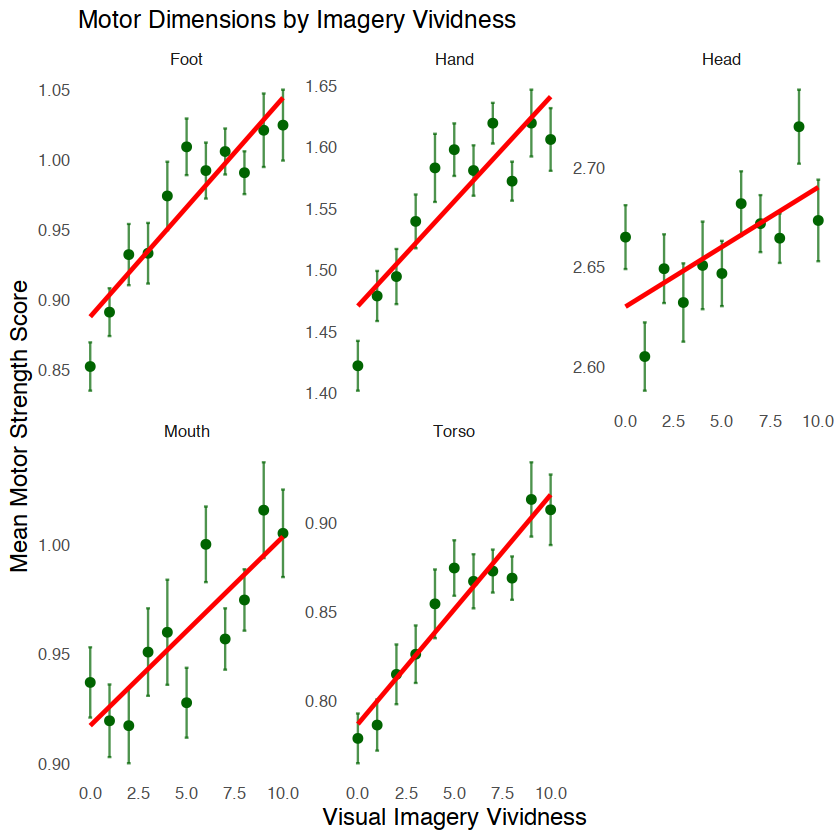

In [7]:
# Create visualization data for motor dimensions
df_motor_subset <- df_responses[, c("visual_vividness", motor_dims)]
df_motor_long <- pivot_longer(df_motor_subset, 
                             cols = -visual_vividness,
                             names_to = "motor_dimension", 
                             values_to = "strength_score")

# Clean up dimension names
df_motor_long$motor_dimension <- case_when(
  df_motor_long$motor_dimension == "head_strength" ~ "Head",
  df_motor_long$motor_dimension == "hand_strength" ~ "Hand", 
  df_motor_long$motor_dimension == "mouth_strength" ~ "Mouth",
  df_motor_long$motor_dimension == "foot_strength" ~ "Foot",
  df_motor_long$motor_dimension == "torso_strength" ~ "Torso"
)

# Calculate summary statistics
df_motor_summary <- df_motor_long %>%
  group_by(visual_vividness, motor_dimension) %>%
  summarise(
    mean_strength = mean(strength_score, na.rm = TRUE),
    se_strength = sd(strength_score, na.rm = TRUE) / sqrt(n()),
    .groups = "drop"
  )

# Create motor plot
p_motor <- ggplot(df_motor_summary, aes(x = visual_vividness, y = mean_strength)) +
  geom_point(color = "darkgreen", size = 2) +
  geom_errorbar(aes(ymin = mean_strength - se_strength, ymax = mean_strength + se_strength), 
                color = "darkgreen", width = 0.2, alpha = 0.7) +
  geom_smooth(method = "lm", se = FALSE, color = "red", size = 1) +
  facet_wrap(~motor_dimension, scales = "free_y", ncol = 3) +
  labs(x = "Visual Imagery Vividness", 
       y = "Mean Motor Strength Score",
       title = "Motor Dimensions by Imagery Vividness") +
  theme_minimal(base_size = 12) +
  theme(
    strip.text = element_text(face = "bold"),
    panel.grid = element_blank(),
    panel.background = element_blank(),
    axis.title = element_text(size = 14)
  )

print(p_motor)

In [32]:
cat("=== MEDIATION ANALYSIS ===\n")
cat("Testing if description length mediates the relationship between LS dimensions and vividness\n\n")

# First, confirm description length is a significant predictor
model_desc_length <- glm(visual_vividness ~ description_length_scaled, data = df_responses)
cat("Description length as predictor of vividness:\n")
print(summary(model_desc_length)$coefficients)

# Set number of bootstrap simulations
num_sims <- 5000
cat("\nUsing", num_sims, "bootstrap simulations for mediation analysis\n")

=== MEDIATION ANALYSIS ===
Testing if description length mediates the relationship between LS dimensions and vividness

Description length as predictor of vividness:
                          Estimate Std. Error    t value     Pr(>|t|)
(Intercept)               5.055953 0.04891303 103.366178 0.000000e+00
description_length_scaled 0.332797 0.04891906   6.803013 1.174586e-11

Using 5000 bootstrap simulations for mediation analysis


In [33]:
cat("=== SENSORY DIMENSIONS MEDIATION ANALYSIS ===\n")

# Fit mediator model (predicting description_length from sensory predictors)
model_mediator_sensory <- glm(description_length_scaled ~ 
                             visual_strength_scaled + auditory_strength_scaled + 
                             gustatory_strength_scaled + haptic_strength_scaled + 
                             olfactory_strength_scaled + interoceptive_strength_scaled, 
                             data = df_responses)

# Fit outcome model (predicting vividness controlling for description_length)
model_outcome_sensory <- glm(visual_vividness ~ 
                            visual_strength_scaled + auditory_strength_scaled + 
                            gustatory_strength_scaled + haptic_strength_scaled + 
                            olfactory_strength_scaled + interoceptive_strength_scaled + 
                            description_length_scaled, 
                            data = df_responses)

cat("Outcome model (controlling for description length):\n")
print(summary(model_outcome_sensory))

# Run mediation analysis for each sensory dimension
cat("\nRunning mediation analyses...\n")

# Visual strength mediation
mediation_visual <- mediate(model_mediator_sensory, model_outcome_sensory, 
                           treat = "visual_strength_scaled", mediator = "description_length_scaled", 
                           boot = TRUE, sims = num_sims)

# Auditory strength mediation
mediation_auditory <- mediate(model_mediator_sensory, model_outcome_sensory, 
                             treat = "auditory_strength_scaled", mediator = "description_length_scaled", 
                             boot = TRUE, sims = num_sims)

# Haptic strength mediation
mediation_haptic <- mediate(model_mediator_sensory, model_outcome_sensory, 
                           treat = "haptic_strength_scaled", mediator = "description_length_scaled", 
                           boot = TRUE, sims = num_sims)

# Interoceptive strength mediation
mediation_interoceptive <- mediate(model_mediator_sensory, model_outcome_sensory, 
                                  treat = "interoceptive_strength_scaled", mediator = "description_length_scaled", 
                                  boot = TRUE, sims = num_sims)

# Olfactory strength mediation
mediation_olfactory <- mediate(model_mediator_sensory, model_outcome_sensory, 
                                  treat = "olfactory_strength_scaled", mediator = "description_length_scaled", 
                                  boot = TRUE, sims = num_sims)

# Gustatory strength mediation
mediation_gustatory <- mediate(model_mediator_sensory, model_outcome_sensory, 
                                  treat = "gustatory_strength_scaled", mediator = "description_length_scaled", 
                                  boot = TRUE, sims = num_sims)

cat("Mediation analyses complete.\n")

=== SENSORY DIMENSIONS MEDIATION ANALYSIS ===
Outcome model (controlling for description length):

Call:
glm(formula = visual_vividness ~ visual_strength_scaled + auditory_strength_scaled + 
    gustatory_strength_scaled + haptic_strength_scaled + olfactory_strength_scaled + 
    interoceptive_strength_scaled + description_length_scaled, 
    data = df_responses)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-8.6230  -2.7472   0.2932   2.4788   7.1777  

Coefficients:
                              Estimate Std. Error t value Pr(>|t|)    
(Intercept)                    5.05595    0.04783 105.707  < 2e-16 ***
visual_strength_scaled         0.39968    0.06822   5.859 5.03e-09 ***
auditory_strength_scaled       0.18242    0.06222   2.932 0.003387 ** 
gustatory_strength_scaled     -0.27667    0.07654  -3.615 0.000304 ***
haptic_strength_scaled         0.31878    0.05337   5.973 2.54e-09 ***
olfactory_strength_scaled      0.35862    0.08279   4.332 1.51e-05 ***
interoce

Running nonparametric bootstrap


Running nonparametric bootstrap




Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Effect Size (β)' in 'mbcsToSbcs': dot substituted for <ce>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Effect Size (β)' in 'mbcsToSbcs': dot substituted for <b2>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Effect Size (β)' in 'mbcsToSbcs': dot substituted for <ce>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Effect Size (β)' in 'mbcsToSbcs': dot substituted for <b2>”


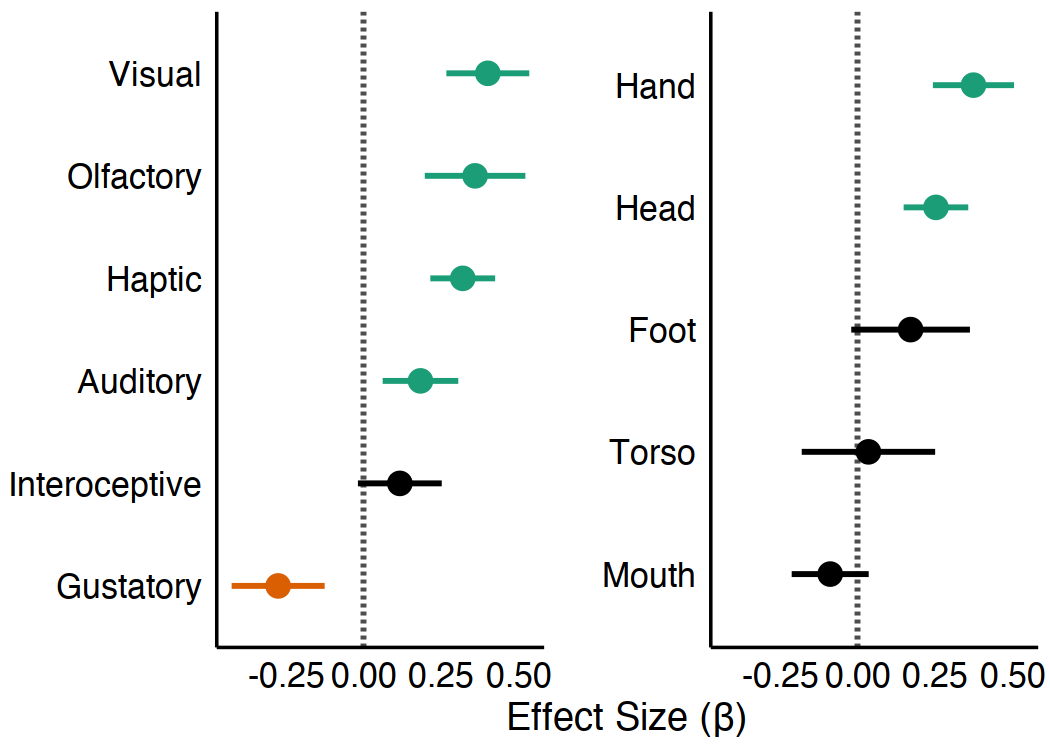

In [39]:
library(broom)

# Set figure size for single-column publication
options(repr.plot.width = 3.5, repr.plot.height = 2.5, repr.plot.res = 300)

# Tidy sensory model output
sensory_df <- tidy(model_outcome_sensory) %>%
  filter(term != "(Intercept)" & term != "description_length_scaled") %>%
  mutate(
    dimension_type = "Sensory",
    label = case_when(
      term == "visual_strength_scaled" ~ "Visual",
      term == "auditory_strength_scaled" ~ "Auditory", 
      term == "gustatory_strength_scaled" ~ "Gustatory",
      term == "haptic_strength_scaled" ~ "Haptic",
      term == "olfactory_strength_scaled" ~ "Olfactory",
      term == "interoceptive_strength_scaled" ~ "Interoceptive"
    )
  )

# Tidy motor model output
motor_df <- tidy(model_outcome_motor) %>%
  filter(term != "(Intercept)" & term != "description_length_scaled") %>%
  mutate(
    dimension_type = "Motor",
    label = case_when(
      term == "head_strength_scaled" ~ "Head",
      term == "hand_strength_scaled" ~ "Hand",
      term == "mouth_strength_scaled" ~ "Mouth",
      term == "torso_strength_scaled" ~ "Torso",
      term == "foot_strength_scaled" ~ "Foot"
    )
  )

# Combine data
combined_df <- rbind(sensory_df, motor_df) %>%
  mutate(
    significance = case_when(
      p.value < 0.05 & estimate > 0 ~ "pos",
      p.value < 0.05 & estimate < 0 ~ "neg",
      TRUE ~ "ns"
    ),
    color = case_when(
      significance == "pos" ~ "#1b9e77",  # Teal
      significance == "neg" ~ "#d95f02",  # Orange/Red
      TRUE ~ "black"
    )
  )

# Order within each facet by effect size
combined_df <- combined_df %>%
  arrange(dimension_type, estimate) %>%
  group_by(dimension_type) %>%
  mutate(label = factor(label, levels = label)) %>%
  ungroup()

# Ensure proper facet ordering
combined_df$dimension_type <- factor(combined_df$dimension_type, 
                                   levels = c("Sensory", "Motor"))

# Create combined forest plot
p_combined_forest <- ggplot(combined_df, aes(x = estimate, y = label)) +
  geom_vline(xintercept = 0, linetype = "dashed", color = "gray30", linewidth = 0.5) +
  geom_point(aes(color = color), size = 2) +
  geom_errorbarh(aes(xmin = estimate - 1.96 * std.error,
                     xmax = estimate + 1.96 * std.error,
                     color = color),
                 height = 0, linewidth = 0.5) +
  scale_color_identity() +
  facet_wrap(~dimension_type, scales = "free_y", ncol = 2) +
  theme_minimal(base_size = 8) +
  theme(
    strip.text = element_blank(),
    panel.grid = element_blank(),
    panel.background = element_blank(),
    axis.text.y = element_text(size = 8, color = "black"),
    axis.text.x = element_text(size = 8, color = "black"),
    axis.title = element_text(size = 9),
    axis.line.x = element_line(color = "black", linewidth = 0.3),
    axis.line.y = element_line(color = "black", linewidth = 0.3),
    plot.title = element_blank(),
    plot.margin = unit(c(0.1, 0.1, 0.1, 0.1), "cm"),
    panel.spacing = unit(0.5, "cm")
  ) +
  xlab("Effect Size (β)") +
  ylab(NULL)

# Save the plot
ggsave("../plots/combined_forest_plot.png", p_combined_forest, 
       width = 3.5, height = 2.5, units = "in", dpi = 300)

print(p_combined_forest)

In [ ]:
cat("=== SENSORY MEDIATION RESULTS ===\n")

# Print detailed results for key dimensions
cat("VISUAL STRENGTH MEDIATION:\n")
print(summary(mediation_visual))

cat("\nINTEROCEPTIVE STRENGTH MEDIATION:\n")
print(summary(mediation_interoceptive))

cat("\nHAPTIC STRENGTH MEDIATION:\n")
print(summary(mediation_haptic))

cat("\nAUDITORY STRENGTH MEDIATION:\n")
print(summary(mediation_auditory))

cat("\nOLFACTORY STRENGTH MEDIATION:\n")
print(summary(mediation_olfactory))

cat("\nGUSTATORY STRENGTH MEDIATION:\n")
print(summary(mediation_gustatory))

# Create summary table of mediation results
mediation_results_sensory <- data.frame(
  Predictor = c("Visual", "Auditory", "Haptic", "Interoceptive", "Olfactory", "Gustatory"),
  ACME = c(mediation_visual$d0, mediation_auditory$d0, 
           mediation_haptic$d0, mediation_interoceptive$d0,
           mediation_olfactory$d0, mediation_gustatory$d0),
  ADE = c(mediation_visual$z0, mediation_auditory$z0, 
          mediation_haptic$z0, mediation_interoceptive$z0,
          mediation_olfactory$z0, mediation_gustatory$z0),
  Total_Effect = c(mediation_visual$tau.coef, mediation_auditory$tau.coef, 
                   mediation_haptic$tau.coef, mediation_interoceptive$tau.coef,
                   mediation_olfactory$tau.coef, mediation_gustatory$tau.coef),
  Prop_Mediated = c(mediation_visual$n0, mediation_auditory$n0, 
                    mediation_haptic$n0, mediation_interoceptive$n0,
                    mediation_olfactory$n0, mediation_gustatory$n0)
)

cat("\nSUMMARY OF SENSORY MEDIATION RESULTS:\n")
# Round only the numeric columns
mediation_results_sensory[, 2:5] <- round(mediation_results_sensory[, 2:5], 4)
print(mediation_results_sensory)

# Extract confidence intervals for key dimensions
visual_ci <- summary(mediation_visual)$z0.ci
interoceptive_ci <- summary(mediation_interoceptive)$z0.ci
auditory_ci <- summary(mediation_auditory)$z0.ci
haptic_ci <- summary(mediation_haptic)$z0.ci
olfactory_ci <- summary(mediation_olfactory)$z0.ci
gustatory_ci <- summary(mediation_gustatory)$z0.ci

cat("\nCONFIDENCE INTERVALS FOR EFFECTS (ADE):\n")
cat("Visual:", round(visual_ci, 4), "\n")
cat("Interoceptive:", round(interoceptive_ci, 4), "\n")
cat("Auditory:", round(auditory_ci, 4), "\n")
cat("Haptic:", round(haptic_ci, 4), "\n")
cat("Olfactory:", round(olfactory_ci, 4), "\n")
cat("Gustatory:", round(gustatory_ci, 4), "\n")

In [35]:
cat("=== MOTOR DIMENSIONS MEDIATION ANALYSIS ===\n")

# Fit mediator model for motor dimensions
model_mediator_motor <- glm(description_length_scaled ~ 
                           head_strength_scaled + hand_strength_scaled + 
                           mouth_strength_scaled + torso_strength_scaled + 
                           foot_strength_scaled, 
                           data = df_responses)

# Fit outcome model for motor dimensions
model_outcome_motor <- glm(visual_vividness ~ 
                          head_strength_scaled + hand_strength_scaled + 
                          mouth_strength_scaled + torso_strength_scaled + 
                          foot_strength_scaled + description_length_scaled, 
                          data = df_responses)

cat("Motor outcome model (controlling for description length):\n")
print(summary(model_outcome_motor))

# Run mediation analysis for each motor dimension
cat("\nRunning motor mediation analyses...\n")

# Head strength mediation
mediation_head <- mediate(model_mediator_motor, model_outcome_motor, 
                         treat = "head_strength_scaled", mediator = "description_length_scaled", 
                         boot = TRUE, sims = num_sims)

# Hand strength mediation
mediation_hand <- mediate(model_mediator_motor, model_outcome_motor, 
                         treat = "hand_strength_scaled", mediator = "description_length_scaled", 
                         boot = TRUE, sims = num_sims)

# Mouth strength mediation
mediation_mouth <- mediate(model_mediator_motor, model_outcome_motor, 
                          treat = "mouth_strength_scaled", mediator = "description_length_scaled", 
                          boot = TRUE, sims = num_sims)

# Torso strength mediation
mediation_torso <- mediate(model_mediator_motor, model_outcome_motor, 
                          treat = "torso_strength_scaled", mediator = "description_length_scaled", 
                          boot = TRUE, sims = num_sims)

# Foot strength mediation
mediation_foot <- mediate(model_mediator_motor, model_outcome_motor, 
                         treat = "foot_strength_scaled", mediator = "description_length_scaled", 
                         boot = TRUE, sims = num_sims)

cat("Motor mediation analyses complete.\n")

=== MOTOR DIMENSIONS MEDIATION ANALYSIS ===
Motor outcome model (controlling for description length):

Call:
glm(formula = visual_vividness ~ head_strength_scaled + hand_strength_scaled + 
    mouth_strength_scaled + torso_strength_scaled + foot_strength_scaled + 
    description_length_scaled, data = df_responses)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-7.3448  -2.7758   0.3738   2.5339   6.7126  

Coefficients:
                          Estimate Std. Error t value Pr(>|t|)    
(Intercept)                5.05595    0.04826 104.767  < 2e-16 ***
head_strength_scaled       0.25163    0.05316   4.733 2.29e-06 ***
hand_strength_scaled       0.37266    0.06676   5.582 2.54e-08 ***
mouth_strength_scaled     -0.08951    0.06338  -1.412   0.1579    
torso_strength_scaled      0.03387    0.10978   0.308   0.7577    
foot_strength_scaled       0.16984    0.09766   1.739   0.0821 .  
description_length_scaled  0.35086    0.04915   7.138 1.11e-12 ***
---
Signif. codes:

Running nonparametric bootstrap


Running nonparametric bootstrap


Running nonparametric bootstrap




In [58]:
cat("=== MOTOR MEDIATION RESULTS ===\n")

# Print detailed results for significant dimensions
cat("HEAD STRENGTH MEDIATION:\n")
print(summary(mediation_head))

cat("\nHAND STRENGTH MEDIATION:\n")
print(summary(mediation_hand))

cat("\nFOOT STRENGTH MEDIATION:\n")
print(summary(mediation_foot))

cat("\nTORSO STRENGTH MEDIATION:\n")
print(summary(mediation_torso))

# Create summary table
mediation_results_motor <- data.frame(
  Predictor = c("Head", "Hand", "Mouth", "Torso", "Foot"),
  ACME = c(mediation_head$d0, mediation_hand$d0, mediation_mouth$d0, 
           mediation_torso$d0, mediation_foot$d0),
  ADE = c(mediation_head$z0, mediation_hand$z0, mediation_mouth$z0, 
          mediation_torso$z0, mediation_foot$z0),
  Total_Effect = c(mediation_head$tau.coef, mediation_hand$tau.coef, mediation_mouth$tau.coef, 
                   mediation_torso$tau.coef, mediation_foot$tau.coef),
  Prop_Mediated = c(mediation_head$n0, mediation_hand$n0, mediation_mouth$n0, 
                    mediation_torso$n0, mediation_foot$n0)
)

cat("\nSUMMARY OF MOTOR MEDIATION RESULTS:\n")
# Round only the numeric columns
mediation_results_motor[, 2:5] <- round(mediation_results_motor[, 2:5], 4)
print(mediation_results_motor)

=== MOTOR MEDIATION RESULTS ===
HEAD STRENGTH MEDIATION:

Causal Mediation Analysis 

Nonparametric Bootstrap Confidence Intervals with the Percentile Method

               Estimate 95% CI Lower 95% CI Upper p-value    
ACME            -0.0310      -0.0428        -0.02  <2e-16 ***
ADE              0.2516       0.1427         0.35  <2e-16 ***
Total Effect     0.2206       0.1110         0.32  <2e-16 ***
Prop. Mediated  -0.1405      -0.3068        -0.08  <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Sample Size Used: 4057 


Simulations: 5000 


HAND STRENGTH MEDIATION:

Causal Mediation Analysis 

Nonparametric Bootstrap Confidence Intervals with the Percentile Method

               Estimate 95% CI Lower 95% CI Upper p-value    
ACME            -0.0557      -0.0733        -0.04  <2e-16 ***
ADE              0.3727       0.2390         0.51  <2e-16 ***
Total Effect     0.3170       0.1853         0.45  <2e-16 ***
Prop. Mediated  -0.1757      -0.3215     

In [24]:
# =============================
# OVERALL MEDIATION ANALYSIS
# =============================
cat("=== OVERALL PERCEPTUAL AND ACTION MEDIATION ANALYSES ===\n")

# ---- MEDIATION MODEL FOR PERCEPTUAL STRENGTH ----
# Step 1: Mediator model (predicting description length)
model_mediator_perceptual <- glm(description_length_scaled ~ perceptual_strength_scaled + action_strength_scaled,
                                 data = df_responses)

# Step 2: Outcome model (predicting vividness, includes mediator)
model_outcome_perceptual <- glm(visual_vividness ~ perceptual_strength_scaled + action_strength_scaled + description_length_scaled,
                                data = df_responses)

# Step 3: Mediation analysis (with perceptual_strength as treatment)
mediation_perceptual <- mediate(model_mediator_perceptual, model_outcome_perceptual,
                                treat = "perceptual_strength_scaled",
                                mediator = "description_length_scaled",
                                boot = TRUE, sims = num_sims)

# ---- MEDIATION MODEL FOR ACTION STRENGTH ----
# Step 1: Mediator model is the same as above
# Step 2: Outcome model (same structure)
model_outcome_action <- glm(visual_vividness ~ perceptual_strength_scaled + action_strength_scaled + description_length_scaled,
                            data = df_responses)

# Step 3: Mediation analysis (with action_strength as treatment)
mediation_action <- mediate(model_mediator_perceptual, model_outcome_action,
                            treat = "action_strength_scaled",
                            mediator = "description_length_scaled",
                            boot = TRUE, sims = num_sims)

# ---- Print summaries ----
cat("PERCEPTUAL STRENGTH MEDIATION:\n")
print(summary(mediation_perceptual))

cat("\nACTION STRENGTH MEDIATION:\n")
print(summary(mediation_action))b

# ---- Summary Table ----
mediation_results_overall <- data.frame(
  Predictor = c("Perceptual Strength", "Action Strength"),
  ACME = c(mediation_perceptual$d0, mediation_action$d0),
  ADE = c(mediation_perceptual$z0, mediation_action$z0),
  Total_Effect = c(mediation_perceptual$tau.coef, mediation_action$tau.coef),
  Prop_Mediated = c(mediation_perceptual$n0, mediation_action$n0)
)

cat("\nSUMMARY OF OVERALL MEDIATION RESULTS:\n")
mediation_results_overall[, 2:5] <- round(mediation_results_overall[, 2:5], 4)
print(mediation_results_overall)


=== OVERALL PERCEPTUAL AND ACTION MEDIATION ANALYSES ===


Running nonparametric bootstrap


Running nonparametric bootstrap




PERCEPTUAL STRENGTH MEDIATION:

Causal Mediation Analysis 

Nonparametric Bootstrap Confidence Intervals with the Percentile Method

               Estimate 95% CI Lower 95% CI Upper p-value    
ACME             -0.122       -0.154        -0.09  <2e-16 ***
ADE               0.347        0.238         0.46  <2e-16 ***
Total Effect      0.225        0.122         0.33  <2e-16 ***
Prop. Mediated   -0.540       -1.046        -0.34  <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Sample Size Used: 4057 


Simulations: 5000 


ACTION STRENGTH MEDIATION:

Causal Mediation Analysis 

Nonparametric Bootstrap Confidence Intervals with the Percentile Method

               Estimate 95% CI Lower 95% CI Upper p-value    
ACME             0.0393       0.0285         0.05  <2e-16 ***
ADE              0.2134       0.1100         0.31  <2e-16 ***
Total Effect     0.2527       0.1497         0.35  <2e-16 ***
Prop. Mediated   0.1554       0.0995         0.28  <2e-16 ***
---